combine small txt files with metrics to long table

In [9]:
import pandas as pd
#from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

#import os
#os.chdir('E:/Master-thesis/7. source code/LiClipse/tspmean/src')
#import viz

metrics_dir='E:/Master-thesis/output/evaluation/metrics/heatmap/'
metrics_file='metrics_heatmap.csv'

#all files in the dir
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(metrics_dir) if isfile(join(metrics_dir, f))]

print onlyfiles

if metrics_file in onlyfiles:
    onlyfiles.remove(metrics_file)
      
df_list=[]
    
for filename in onlyfiles:

    df=pd.read_csv(metrics_dir+filename,delimiter=',',header=0)
    df_list.append(df)

df_full=pd.concat(df_list,axis=0)

#print df_full
#df_full.drop('parameter',axis=1,inplace=True)
df_full.reset_index(inplace=True)
df_full.drop('index',axis=1,inplace=True)
#print df_full
#df_em=df_full.loc[(df_full.ordering=='EM') | (df_full.ordering=='EMmanhattan')]
#df = df.drop(df[<some boolean condition>].index)
df_full.drop(df_full[df_full.ordering=='original'].index,inplace=True)
#df_full.drop(df_full[df_full.metric=='grid_stddev'].index,inplace=True)
df_full['ratio']=0
df_full['rank']=0
#df_full['metric']=df_full['parameter']
#df_full.drop('parameter',axis=1,inplace=True)
ordering_methods=df_full.ordering.unique()
datasets=df_full.dataset.unique()

for dataset in datasets:
    #loc metrics for this dataset
    df_dataset=df_full.loc[df_full.dataset==dataset]
    metrics=df_dataset.metric.unique()
    for metric in metrics:
        #find all rows
        data=df_dataset.loc[df_dataset.metric==metric]
        base=data.loc[data.ordering=='random','value'].values[0]
        data.sort_values(by='value',inplace=True)
        #print data
        #print base
        rank=1
        for index,row in data.iterrows():
            df_full.loc[index,'ratio']=df_full.loc[index,'value']/base
            df_full.loc[index,'rank']=rank
            rank+=1
            
print df_full

['aaup_heatmap.txt', 'abalone_heatmap.txt', 'alon_heatmap.txt', 'auto_heatmap.txt', 'bike_heatmap.txt', 'cars_heatmap.txt', 'community_heatmap.txt', 'golub_heatmap.txt', 'income_heatmap.txt', 'iris_heatmap.txt', 'magic_heatmap.txt', 'noisy_wave_heatmap.txt', 'olive_heatmap.txt', 'parkinson_heatmap.txt', 'subway_heatmap.txt', 'traffic_heatmap.txt', 'waveform_heatmap.txt', 'wdbc_heatmap.txt', 'wine_heatmap.txt', 'yeast_heatmap.txt']


C:\Users\khamidova\Anaconda2\lib\site-packages\ipykernel\__main__.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


     dataset  ordering        metric  parameter         value      ratio  rank
0       aaup      TSNE  grid_entropy          5     97.473768   0.919934     5
1       aaup      TSNE  grid_entropy         10    347.501008   3.279631    14
2       aaup      TSNE  grid_entropy         15    721.633568   6.810605    21
3       aaup      TSNE  grid_entropy         20   1214.076652  11.458164    30
4       aaup      TSNE  grid_entropy         30   2488.780939  23.488518    38
5       aaup      TSNE   grid_stddev          5    675.844432   0.776795     5
6       aaup      TSNE   grid_stddev         10   2197.844919   2.526135    14
7       aaup      TSNE   grid_stddev         15   4199.904045   4.827240    22
8       aaup      TSNE   grid_stddev         20   6767.520073   7.778379    29
9       aaup      TSNE   grid_stddev         30  12795.451897  14.706697    38
10      aaup    random  grid_entropy          5    105.957342   1.000000     8
11      aaup    random  grid_entropy         10    3

Pivot table:
Metrics as columns, datasets and ordering as rows
Save table to Excel sheet

In [10]:
import numpy as np
#change names
df_full.loc[df_full['ordering']=='EM','ordering']='EM-euc'
df_full.loc[df_full['ordering']=='EMmanhattan','ordering']='EM-man'
df_full.loc[df_full['ordering']=='HColo','ordering']='HC-olo'
df_full.loc[df_full['ordering']=='TSPmeans','ordering']='TSP-means'
#df_full.loc[df_full['metric']=='fom','metric']='FOM'
#df_full.loc[df_full['metric']=='neumann_stress','metric']='Stress'
#df_full.loc[df_full['metric']=='path_length_euclidian','metric']='LE'
#df_full.loc[df_full['metric']=='path_length_manhattan','metric']='LM'

#df_full['ratio']=df_full['ratio'].apply(lambda x: np.round(x, decimals=3))
#df_full['value']=df_full['value'].apply(lambda x: np.round(x, decimals=3))
df_full['value']=df_full['value'].apply(lambda x: np.round(x, decimals=3))
df_full.loc[df_full['value']>1000,'value']=df_full['value'].apply(lambda x: np.round(x, decimals=0))
print df_full
#print df_full
data=pd.pivot_table(df_full,values='value',index=['dataset','metric','parameter'],columns='ordering')
#data=pd.pivot_table(df_full,index=['dataset','ordering'],columns='metric')


writer=pd.ExcelWriter('heatmap.xlsx')
data.to_excel(writer)
writer.close()
data

     dataset   ordering        metric  parameter      value      ratio  rank
0       aaup       TSNE  grid_entropy          5     97.474   0.919934     5
1       aaup       TSNE  grid_entropy         10    347.501   3.279631    14
2       aaup       TSNE  grid_entropy         15    721.634   6.810605    21
3       aaup       TSNE  grid_entropy         20   1214.000  11.458164    30
4       aaup       TSNE  grid_entropy         30   2489.000  23.488518    38
5       aaup       TSNE   grid_stddev          5    675.844   0.776795     5
6       aaup       TSNE   grid_stddev         10   2198.000   2.526135    14
7       aaup       TSNE   grid_stddev         15   4200.000   4.827240    22
8       aaup       TSNE   grid_stddev         20   6768.000   7.778379    29
9       aaup       TSNE   grid_stddev         30  12795.000  14.706697    38
10      aaup     random  grid_entropy          5    105.957   1.000000     8
11      aaup     random  grid_entropy         10    396.737   3.744307    16

ordering                           EM-euc     EM-man     HC-olo         LK  \
dataset metric       parameter                                               
aaup    grid_entropy 5             96.145     94.458     96.762     99.128   
                     10           335.349    335.602    340.343    347.194   
                     15           696.042    697.309    706.947    722.678   
                     20          1177.000   1170.000   1179.000   1207.000   
                     30          2430.000   2413.000   2420.000   2464.000   
        grid_stddev  5            621.039    620.125    631.661    683.123   
                     10          1950.000   1950.000   2021.000   2047.000   
                     15          3661.000   3626.000   3749.000   3934.000   
                     20          5770.000   5722.000   5878.000   6128.000   
                     30         10881.000  10428.000  10787.000  10997.000   
abalone grid_entropy 5             92.232     93.437     91.343     93.956   
                     10           320.436    323.389    323.334    328.704   
                     15           667.012    671.308    675.374    698.867   
                     20          1137.000   1141.000   1145.000   1174.000   
                     30          2368.000   2382.000   2390.000   2443.000   
        grid_stddev  5            561.288    580.697    537.582    567.907   
                     10          1497.000   1493.000   1422.000   1500.000   
                     15          2740.000   2722.000   2833.000   3018.000   
                     20          4704.000   4399.000   4384.000   4723.000   
                     30          8230.000   8537.000   8815.000   8985.000   
alon    grid_entropy 5            114.583    115.487    115.223    117.629   
                     10           449.189    449.444    449.422    459.383   
                     15           990.031    990.361    992.025   1009.000   
                     20          1717.000   1719.000   1721.000   1745.000   
                     30          3674.000   3677.000   3681.000   3709.000   
        grid_stddev  5            988.469   1049.000   1007.000   1188.000   
                     10          3793.000   3929.000   3813.000   4476.000   
                     15          8397.000   8522.000   8530.000   9816.000   
                     20         14735.000  15061.000  14831.000  16806.000   
                     30         32673.000  33458.000  32958.000  35484.000   
...                                   ...        ...        ...        ...   
wdbc    grid_entropy 5            106.598    106.311    106.749    107.354   
                     10           388.294    385.293    387.105    388.194   
                     15           781.837    776.118    778.263    781.518   
                     20          1318.000   1311.000   1308.000   1310.000   
                     30          2288.000   2277.000   2265.000   2264.000   
        grid_stddev  5            713.899    710.046    743.392    750.722   
                     10          2582.000   2546.000   2759.000   2748.000   
                     15          4788.000   4732.000   5354.000   5340.000   
                     20          8467.000   8361.000   9613.000   9695.000   
                     30         12949.000  13011.000  16340.000  16474.000   
wine    grid_entropy 5            100.769    100.616    101.797    102.005   
                     10           319.246    319.081    322.405    323.104   
                     15           609.666    605.779    613.159    613.759   
                     20           948.194    947.527    953.645    959.316   
                     30          1751.000   1748.000   1757.000   1765.000   
        grid_stddev  5           1050.000   1047.000   1103.000   1110.000   
                     10          3627.000   3612.000   4055.000   4040.000   
                     15          7216.000   7056.000   8333.000   8287.000   
                     2

Create graphics

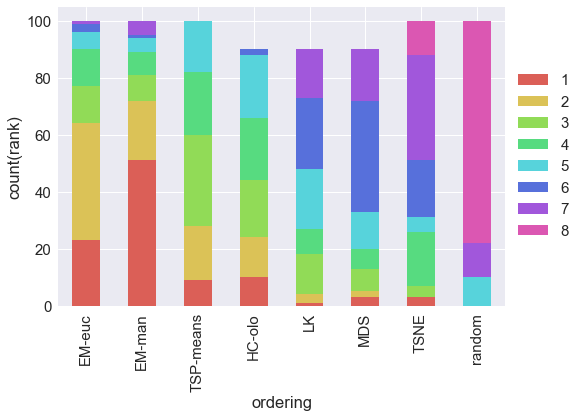

rank   ordering     1     2     3     4     5     6     7     8
0        EM-euc  23.0  41.0  13.0  13.0   6.0   3.0   1.0   NaN
1        EM-man  51.0  21.0   9.0   8.0   5.0   1.0   5.0   NaN
2        HC-olo  10.0  14.0  20.0  22.0  22.0   2.0   NaN   NaN
3            LK   1.0   3.0  14.0   9.0  21.0  25.0  17.0   NaN
4           MDS   3.0   2.0   8.0   7.0  13.0  39.0  18.0   NaN
5          TSNE   3.0   NaN   4.0  19.0   5.0  20.0  37.0  12.0
6     TSP-means   9.0  19.0  32.0  22.0  18.0   NaN   NaN   NaN
7        random   NaN   NaN   NaN   NaN  10.0   NaN  12.0  78.0


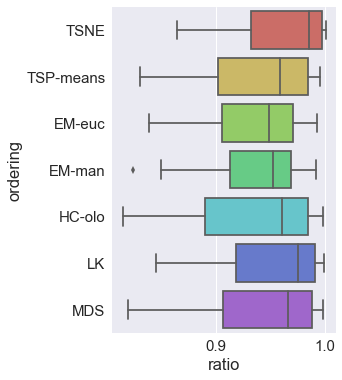

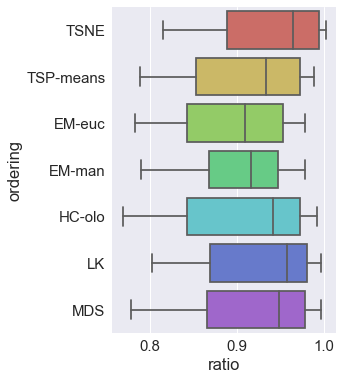

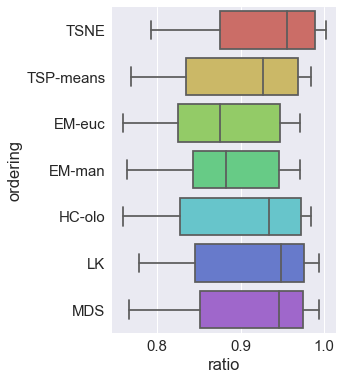

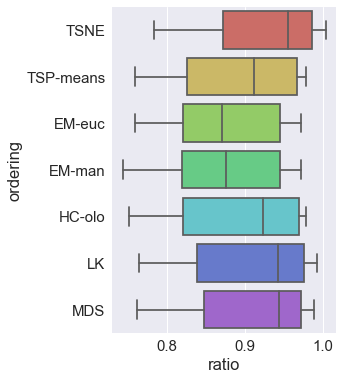

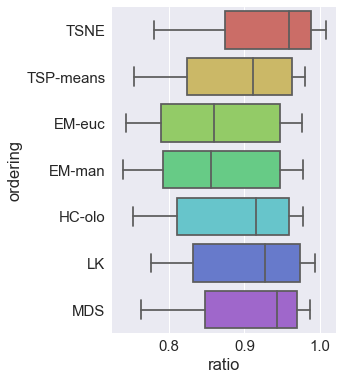

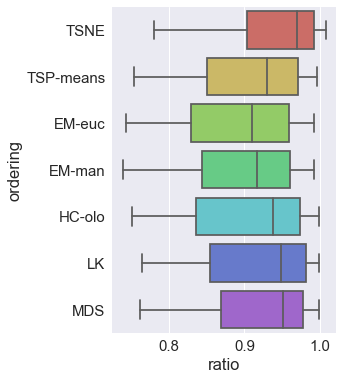

In [2]:
import seaborn as sns
sns.set(font_scale=1.5)
#sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set_palette(sns.color_palette("hls", 8))
#sns.set_palette(sns.color_palette("husl", 8))

df_full.loc[df_full['ordering']=='EM','ordering']='EM-euc'
df_full.loc[df_full['ordering']=='EMmanhattan','ordering']='EM-man'
df_full.loc[df_full['ordering']=='HColo','ordering']='HC-olo'
df_full.loc[df_full['ordering']=='TSPmeans','ordering']='TSP-means'

orderings = ['EM-euc', 'EM-man', 'TSP-means', 'HC-olo', 'LK', 'MDS', 'TSNE','random']
mapping = {ordering: i for i, ordering in enumerate(orderings)}


sns.plt.clf()
#sns.plt.cla()
data_plot=df_full.copy()
#print data_plot
data_places=data_plot[['ordering','rank','value']]
data_places=pd.pivot_table(data_places,values='value',index=['ordering'],columns=['rank'],aggfunc='count')
data_places.reset_index(inplace=True)

#data_places.drop('rank',axis=1,inplace=True)
key = data_places['ordering'].map(mapping)
#print key

#Rank stacket barplot
data_places.iloc[key.argsort()].plot(x='ordering',kind='bar', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax=sns.plt.gca()
ax.set(ylabel='count(rank)')
sns.plt.show()

#save data to Excel
print data_places
writer=pd.ExcelWriter('entropy.xlsx')
data_places.iloc[key.argsort()].to_excel(writer)
writer.close()

"""
sns.palplot(sns.color_palette("hls", 8))
sns.plt.show()


sns.plt.clf()
#sns.plt.cla()
data_plot=df_full.copy()
#print data_plot
data_places=data_plot[['ordering','rank','value']]
data_places=pd.pivot_table(data_places,values='value',index=['rank'],columns=['ordering'],aggfunc='count')

print data_places.columns
data_places.plot(kind='bar', stacked=True,color=sns.color_palette()).legend(loc='center left', bbox_to_anchor=(1, 0.5))
#sns.plt.legend(loc='best')
sns.plt.show()

'''
sns.plt.clf()
sns.countplot(x="place", hue="ordering", data=data_plot)
sns.plt.show()
sns.plt.clf()
'''
"""

#EXCLUDE random ordering
data_plot=data_plot.loc[data_plot.ordering!='random']

data_plot5=data_plot.loc[data_plot.metric==5]
data_plot10=data_plot.loc[data_plot.metric==10]
data_plot15=data_plot.loc[data_plot.metric==15]
data_plot20=data_plot.loc[data_plot.metric==20]
data_plot30=data_plot.loc[data_plot.metric==30]

#BOXPLOTS for each metric

fig=sns.plt.figure()
fig.set_size_inches(4, 6)
sns.boxplot(x="ratio", y="ordering", data=data_plot5)
#sns.plt.xlim(0,1)
sns.plt.show()

fig=sns.plt.figure()
fig.set_size_inches(4, 6)
sns.boxplot(x="ratio", y="ordering", data=data_plot10)
#sns.plt.xlim(0.6,1)
sns.plt.show()

fig=sns.plt.figure()
fig.set_size_inches(4, 6)
sns.boxplot(x="ratio", y="ordering", data=data_plot15)
#sns.plt.xlim(0.6,1)
sns.plt.show()

fig=sns.plt.figure()
fig.set_size_inches(4, 6)
sns.boxplot(x="ratio", y="ordering", data=data_plot20)
#sns.plt.xlim(0.4,1)
sns.plt.show()

fig=sns.plt.figure()
fig.set_size_inches(4, 6)
sns.boxplot(x="ratio", y="ordering", data=data_plot30)
#sns.plt.xlim(0.4,1)
sns.plt.show()

fig=sns.plt.figure()
fig.set_size_inches(4, 6)
sns.boxplot(x="ratio", y="ordering", data=data_plot)
#sns.plt.xlim(0.6,1)
sns.plt.show()


UNUSED: PC visualization

In [5]:
df_full.loc[df_full['ordering']=='EM','ordering']='EM-euc'
df_full.loc[df_full['ordering']=='EMmanhattan','ordering']='EM-man'
df_full.loc[df_full['ordering']=='HColo','ordering']='HC-olo'
df_full.loc[df_full['ordering']=='TSPmeans','ordering']='TSP-means'

data_plot=df_full.copy()
data_plot.drop(data_plot[data_plot.ordering=='random'].index,inplace=True)
data_plot.drop('value',axis=1,inplace=True)
data_plot.drop('rank',axis=1,inplace=True)
#data_plot.drop('dataset',axis=1,inplace=True)
data_pivot=pd.pivot_table(data_plot,index=['dataset','ordering'],columns='metric')

data_pivot.reset_index(inplace=True)
data_pivot.drop('dataset',axis=1,inplace=True)
#data_pivot
data_pivot.columns = ['ordering',5,10,15,20,30]
from pandas.plotting import parallel_coordinates
from matplotlib import pyplot as plt
parallel_coordinates(data_pivot, 'ordering')

#plt.show()

import os
os.chdir('E:/Master-thesis/7. source code/LiClipse/tspmean/src')
import viz

viz.scaledPC(data_pivot,'heatmap_metrics.png','ordering')

#levels = data_pivot.columns.levels
#labels = data_pivot.columns.labels
#data_pivot.columns = levels[1][labels[1]]

#data_pivot

C:\Users\khamidova\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
